In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jyots/Desktop/DS_Projects/airbnb_DataSets/Paris_dfm.csv',
                   encoding='utf8')

In [3]:
df.head(2)

,Unnamed: 0,bathrooms,bedrooms,dist_arprt,host_count,metrostn_count,neighborhood,overall_satisfaction,price,rest_count,review_count,reviews,room_type
0,0,1.0,1.0,0.19109,478,6,Amerique,5.0,93.0,1,3682,7,Entire home/apt
1,1,1.0,1.0,0.19109,478,6,Amerique,4.5,73.0,1,3682,31,Entire home/apt


In [4]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
df.shape

(41192, 12)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV, ElasticNet, LassoCV, Lasso

import patsy

In [106]:
X = df[[x for x in df.columns if x != 'price']]
y = df.price.values
target = np.log(y)


In [139]:
formula = "target ~ "+' + '.join([x for x in df.columns if not x =='price'])+' -1'
formula

u'target ~ bathrooms + bedrooms + dist_arprt + host_count + metrostn_count + neighborhood + overall_satisfaction + rest_count + review_count + reviews + room_type -1'

In [140]:
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
y = y.values.ravel()

In [141]:
y

array([ 4.53259949,  4.29045944,  3.91202301, ...,  4.61512052,
        6.10479323,  4.49980967])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [110]:
X_train.shape, X_test.shape

((28834, 91), (12358, 91))

In [111]:
linmod = LinearRegression()

In [112]:
scores = cross_val_score(linmod, X_train, y_train, cv = 10)
print scores
print np.mean(scores)
print np.std(scores)

[ 0.58412037  0.6067559   0.58328996  0.60221985  0.58539471  0.59034759
  0.6083725   0.58307334  0.60205744  0.60170102]
0.594733269321
0.00987316451345


In [113]:
predictions = cross_val_predict(linmod, X_test, y_test, cv = 10) 
accuracy = metrics.r2_score(y_test, predictions)
print accuracy


0.57323717308


In [114]:
residuals = y_test - predictions
residuals

array([-0.62466229,  0.44574319, -0.66217085, ..., -0.47907973,
       -0.53766496, -0.59437772])

In [115]:
np.mean(predictions)


4.582167204045148

In [116]:
linmod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
linmod.score(X_test, y_test)

0.58024876665948155

In [118]:
#linmod.coef_

In [119]:
print np.mean(y_train), np.mean(y_test)

4.58238956051 4.5823259832


In [120]:
# Regularization: Gridsearch an optimal ElasticNet regression

In [121]:
Xn = StandardScaler().fit_transform(X)

In [122]:
Xn_train, Xn_test, y_train, y_test = train_test_split(Xn, y, test_size = 0.3)

In [123]:
enet_cv = ElasticNetCV(l1_ratio=np.linspace(0.01, 1., 50), n_alphas=300, cv=10, verbose=1)
enet_cv.fit(Xn_train, y_train)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.01   ,  0.0302 ,  0.05041,  0.07061,  0.09082,  0.11102,
        0.13122,  0.15143,  0.17163,  0.19184,  0.21204,  0.23224,
        0.25245,  0.27265,  0.29286,  0.31306,  0.33327,  0.35347,
        0.37367,  0.39388,  0.41408,  0.43429,  0.45449,  0.47469,
        0.4949 ,  0.515...3837,
        0.85857,  0.87878,  0.89898,  0.91918,  0.93939,  0.95959,
        0.9798 ,  1.     ]),
       max_iter=1000, n_alphas=300, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=1)

In [124]:
print enet_cv.l1_ratio_
print enet_cv.alpha_

0.515102040816
0.000616969774739


In [125]:
enet = ElasticNet(alpha= enet_cv.alpha_, l1_ratio=enet_cv.l1_ratio_)

y_pred_enet = enet.fit(Xn_train, y_train).predict(Xn_test)
r2_score_enet = metrics.r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)


ElasticNet(alpha=0.00061696977473881638, copy_X=True, fit_intercept=True,
      l1_ratio=0.51510204081632649, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.595947


In [126]:
lassocv = LassoCV(n_alphas=300, cv=10)

In [127]:
lassocv.fit(Xn_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=300, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [128]:
lassocv.alpha_

0.00031780239008995389

In [129]:
lasso = Lasso(alpha=lassocv.alpha_)

y_pred_lasso = lasso.fit(Xn_train, y_train).predict(Xn_test)
r2_score_lasso = metrics.r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)


Lasso(alpha=0.00031780239008995389, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.595946


In [130]:
lasso.fit(Xn_train, y_train)

lasso_coef = pd.DataFrame({
        'variable':X_train.columns,
        'coef':lasso.coef_,
        'abscoef':np.abs(lasso.coef_)
    })

lasso_coef.sort_values('abscoef', ascending=False, inplace=True)
lasso_coef[lasso_coef.coef != 0].head(25)


,abscoef,coef,variable
83,0.275991,0.275991,bedrooms
80,0.155872,-0.155872,room_type[T.Private room]
84,0.099053,0.099053,dist_arprt
81,0.082451,-0.082451,room_type[T.Shared room]
85,0.068864,-0.068864,host_count
82,0.067214,0.067214,bathrooms
89,0.066497,0.066497,review_count
88,0.065697,0.065697,rest_count
43,0.041367,0.041367,neighborhood[Notre-Dame]
86,0.035782,-0.035782,metrostn_count


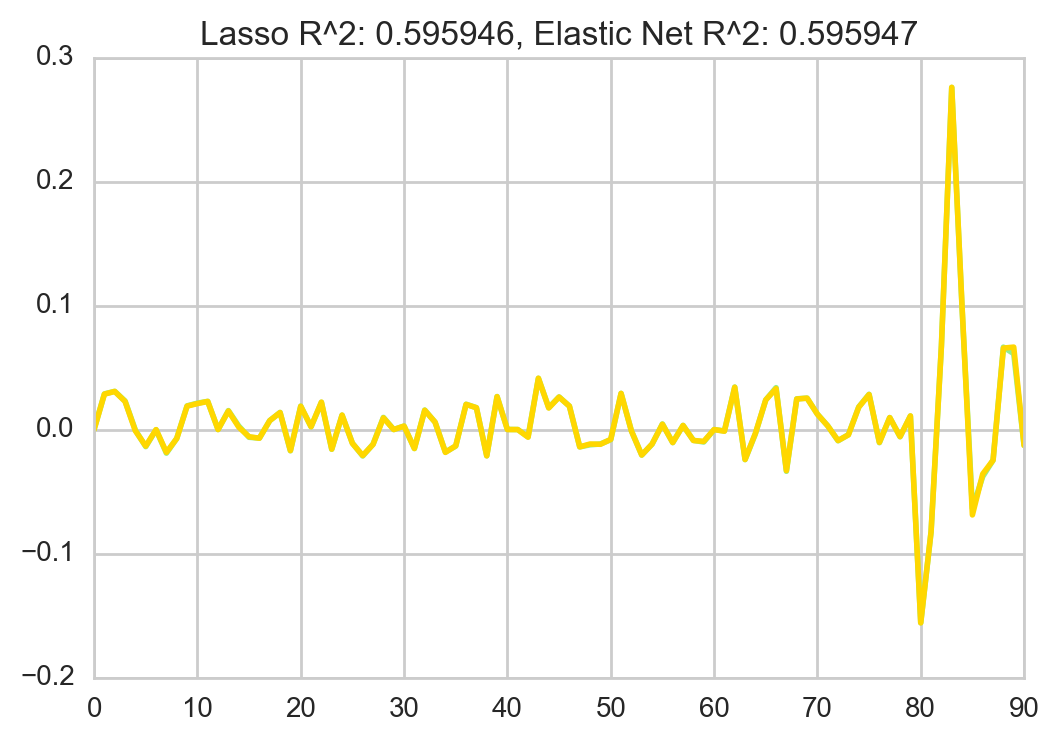

In [131]:
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(lassocv.coef_, color='gold', linewidth=2,
         label='Lasso coefficients')
#plt.plot(linmod.coef_, '--', color='navy', label='original coefficients')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()

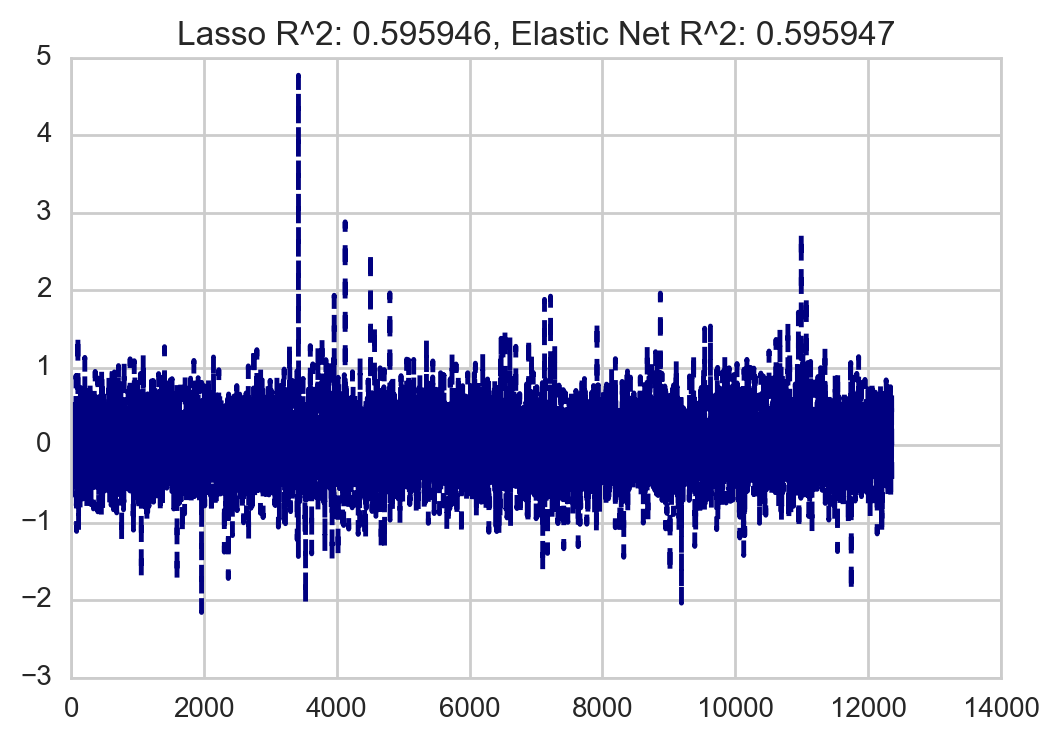

In [132]:
plt.plot(residuals, '--', color='navy', label='original coefficients')
plt.title("Lasso R^2: %f, Elastic Net R^2: %f"
          % (r2_score_lasso, r2_score_enet))
plt.show()